In [94]:
log_path = "../accuracies3.log"
sem_accs = dict()
synt_accs = dict()
current_header = None
header_match = "[INFO] Current vec len "
sem_match = "Semantic accuracy: "
synt_match = "Syntactic accuracy: "
for l in open(log_path, "r").readlines():
    l = str(l)
    if l.startswith(header_match):
        current_header = int(l[len(header_match):-2])
    if sem_match in l:
        sem_offset = l.index(sem_match) + len(sem_match)
        synt_offset = l.index(synt_match) + len(synt_match)

        new_sem_val = float(l[sem_offset:l.find(" ", sem_offset)])
        new_synt_val = l[synt_offset:l.find(" ", synt_offset)]
        if "nan" in new_synt_val:
            new_synt_val = 0
        else:
            new_synt_val = float(new_synt_val)
        try:
            sem_accs[current_header].append(new_sem_val)
            synt_accs[current_header].append(new_synt_val)
        except KeyError:
            sem_accs[current_header] = [new_sem_val]
            synt_accs[current_header] = [new_synt_val]

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

sem_accs = pd.DataFrame(sem_accs)
synt_accs = pd.DataFrame(synt_accs)

sem_accs.describe()

,10,12,14,16,18,20,22,24,26,28,...,560,580,600,620,640,660,680,700,720,740
count,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.703571,38.441429,40.954286,37.173571,35.142143,38.704286,39.005714,38.216429,37.314286,37.824286
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.023459,7.591105,7.886506,8.114481,8.945509,8.255694,8.052010,7.376960,7.903749,8.286927
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.300000,35.050000,36.890000,33.370000,32.350000,33.230000,35.490000,33.120000,32.490000,34.720000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.480000,36.280000,38.830000,34.970000,32.490000,36.760000,36.730000,36.440000,35.380000,35.410000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.480000,36.280000,38.830000,34.970000,32.490000,36.760000,36.730000,36.440000,35.380000,35.410000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.480000,36.280000,38.830000,34.970000,32.490000,36.760000,36.730000,36.440000,35.380000,35.410000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.440000,64.620000,68.180000,65.220000,66.010000,67.190000,66.800000,63.640000,64.620000,66.400000


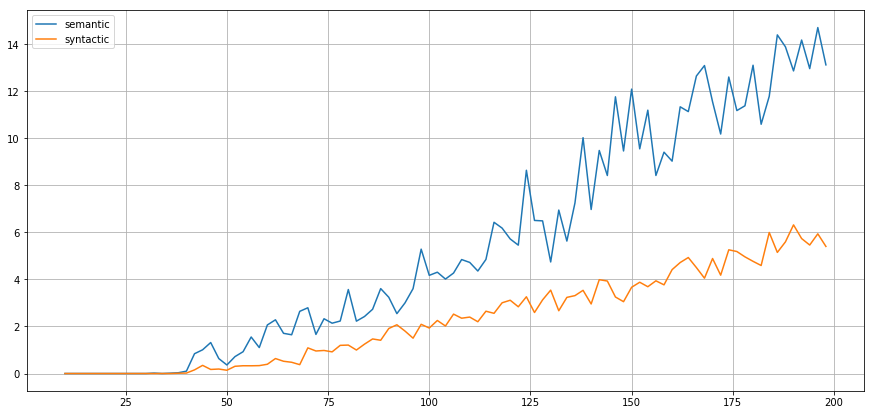

In [93]:
# detail of dimensions below 200
plt.figure(figsize = (15, 7))
ax = sem_accs.mean().plot(grid=True)
synt_accs.mean().plot(grid=True, ax=ax)
ax.legend(["semantic", "syntactic"])

In [96]:
# scale to high-dimensions interval
sem_accs = sem_accs[list(range(20, 760, 20))]
synt_accs = synt_accs[list(range(20, 760, 20))]

In [97]:
len(sem_accs.mean().index)

37

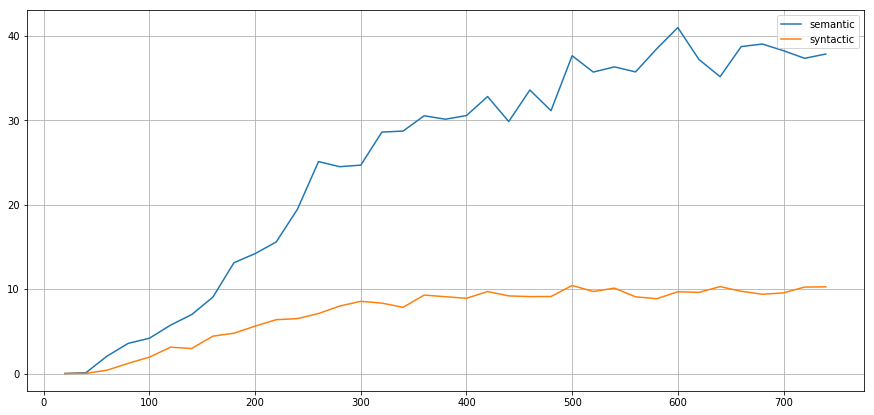

In [98]:
plt.figure(figsize = (15, 7))
ax = sem_accs.mean().plot(grid=True)
synt_accs.mean().plot(grid=True, ax=ax)
ax.legend(["semantic", "syntactic"])